# 0. Loading libraries and Classes

In [1]:
# Import necessary libraries for this notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

# Import train_test_split to separate train and test set
from sklearn.model_selection import train_test_split
# Import VarianceThreshold to removes all low-variance features
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

**Important** thing to remember is that we should perform feature selection in conjunction with the model selection

## 1. Constant Features
Constant features do not provide any information useful for further analysis or predicting the target variable. These features provide only a single value for all of the observations in the dataset. Therefore, we can remove them from the dataset.

We will be working with the subset of Santander Bank dataset $^{1}$ (30 000 rows), which contain anonymized features to predict customer satisfaction regarding their experience with the bank.


In [2]:
# Load the subset dataset called 'subset_santander.csv' and store it to variable data
data = pd.read_csv('../Data/subset_santander.csv')

# Print the shape of the dataframe and get the first 10 rows
print(data.shape)
data.head(10)

(4000, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


Feature selection should be performed only on our training data to avoid overfitting. Let's split our dataset and drop our TARGET feature.

In [3]:
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels = ['TARGET'], axis = 1),
                                                    data['TARGET'],
                                                    test_size = 0.3,
                                                    random_state = 42)

# Get the shape of training and testing set
X_train.shape, X_test.shape

((2800, 370), (1200, 370))

There are 370 features in our dataset. We can now look at whether there are some constant features in X_train set using `NumPy's .var()` function, which computes the variance along with columns. Within this function we can specify argument `ddof = 1`, for more information here is the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.var.html).

In [4]:
# Get the features that have the variance equal to zero
# Optional: Specify ddof = 1 within the `.var()` function 

our_constant_features = X_train.loc[:, X_train.var(ddof = 1) == 0]

In [5]:
# Print our_constant_features
our_constant_features

,ind_var2_0,ind_var2,ind_var13_medio_0,ind_var13_medio,ind_var18_0,ind_var18,ind_var27_0,ind_var28_0,ind_var28,ind_var27,...,num_trasp_var33_out_ult1,num_venta_var44_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3
3215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 64 features with zero variance, which will be removed from our dataset. 

In [6]:
# Remove constant features from X_train, do not forget specify argument inplace = True
X_train.drop(labels= our_constant_features, axis=1, inplace=True)
# Remove constant features from X_test, do not forget specify argument inplace = True
X_test.drop(labels= our_constant_features, axis=1, inplace=True)

# Get the shape after removing constant features
X_train.shape, X_test.shape

((2800, 277), (1200, 277))

## 2. Quasi-constant Features

Quasi-constant features have very low variance (or close to 0) and contain little information, which is not useful for us. These approximately constant features won't help the ML model's performance, therefore we should consider removing them. 

We could filter quasi-constant features with `pandas`  in a similar way as we did with constant features, with one difference - we would set a specific threshold. Nevertheless, now we'll leave `pandas` and use rather `scikit learn` that offers a more convenient way to find quasi-constant features. 

In the `sklearn.feature_selection module` we can find feature selector called `VarianceThreshold()`, which finds all features with low variance (based on a specified threshold) and remove them. You can find more information about this selector [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html).

As a first step, we define our selector for quasi-constant features, where we set the threshold = 0.01. In other words, this is the minimum value of the variance we want to have in the dataset. 

In [7]:
# Define VarianceThreshold() object and specify parameter threshold = 0.01
our_selector = VarianceThreshold(threshold = 0.01)

Next, we fit 'X_train' data with 'our_selector' that find quasi-constant features.

In [8]:
# Fit X_train with 'our_selector'
our_selector.fit(X_train)

VarianceThreshold(threshold=0.01)

Using `get_support()` method, we can get all of the features we want to keep along with their names. This 'mask' we will use later to assign columns names.

*Note: You might wonder why we are saving feature names as `features_to_keep` variable. Scikit learn will always save the necessary state inside of the fitted transformer, but we only do it for our convience so that we can later on go back from the nameless numpy to a nice dataframe with all the column names.*

In [9]:
# Get the mask of features we want to keep in the dataset
features_to_keep = X_train.columns[our_selector.get_support()]

# Print the length
print('The number of features that will be kept: {}'.format(len(features_to_keep)))

The number of features that will be kept: 237


The next step is transforming our X_train and X_test data using our_selector.

In [10]:
# Transform X_train and X_test = in this step, the quasi-constant featues will be finally removed
X_train = our_selector.transform(X_train)
X_test = our_selector.transform(X_test)

# Get the shape of X_train and X_test
X_train.shape, X_test.shape

((2800, 237), (1200, 237))

X_train is `numpy.ndarray` object after transforming and needs to be transformed into `pandas DataFrame` again. Here, we use our created 'features_to_keep' variable to assign column names.

In [11]:
# Print X_train
X_train

array([[6.4690000e+03, 2.0000000e+00, 2.3000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.3207767e+05],
       [6.2990000e+03, 2.0000000e+00, 2.5000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.4173995e+05],
       [1.4060000e+03, 2.0000000e+00, 3.6000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.7636187e+05],
       ...,
       [1.7030000e+03, 2.0000000e+00, 1.7000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0149234e+05],
       [7.0200000e+03, 2.0000000e+00, 3.3000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 5.8744860e+04],
       [6.3840000e+03, 2.0000000e+00, 2.5000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.2405636e+05]])

In [12]:
# Convert X_train to pandas DataFrame
X_train= pd.DataFrame(X_train)
# Using '.columns' attribute assign column names
X_train.columns = features_to_keep

# Convert X_test to pandas DataFrame
X_test= pd.DataFrame(X_test)
# Using '.columns' attribute assign column names
X_test.columns = features_to_keep

# Get the first 5 rows of X_train
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,6469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132077.67
1,6299.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141739.95
2,1406.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176361.87
3,7230.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,613003.29
4,4765.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51303.69


## 3. Duplicated Features (READ-ONLY)
Duplicated features are totally redundant features, thus not providing any useful or new information for improving the model's performance.

To better understand how duplicated features can be treated using `pandas`, we create new DataFrame. We've already seen `duplicated()` function, that returns boolean Series denoting duplicate rows. To identify duplicated features, we have to first transpose our data frame, in other words, we swap the rows and columns. More information [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html).

You might wonder again, why are we not using the `scikit-learn`? The reason is that duplicated features should be already addressed within data integration and preprocessing. You might remember that these are the earliest stages. The reason is that duplicated values usually occur when we are merging data from various sources. **It was not a priority for scikit developers to implement a specific transformer for this**.

We are doing an ugly operation of swapping rows and columns to make use of Pandas functionality and make this operation as easy as possible. Yes, we are advising to do this with a small dataset such as ours. If you have a *big* dataset, for example, counted in TBs, you will most likely not be able to do this.

In [13]:
# Run this code to create new DataFrame
our_data  =[(1, 'Colin Trevorrow', 124, 150 ,'Colin Trevorrow', 150, 'Jurassic World'),
           (2, 'George Miller', 120, 55, 'George Miller', 55, 'Mad Max: Fury Road'),
           (3, 'Robert Schwentke', 119, 112, 'Robert Schwentke', 112, 'Insurgent'),
           (4, 'J.J. Abrams', 136, 220,'J.J. Abrams', 220, 'Star Wars: The Force Awakens'),
           (5, 'James Wan', 137, 154, 'James Wan', 154, 'Furious 7'),
           (6, 'Bruce Brown', 95, 25, 'Bruce Brown', 25, 'The Endless Summer'),
           (7, 'Woody Allen', 80, 15, 'Woody Allen', 15, 'What`s Up, Tiger Lily?'),
           (8, 'James Cameron', 162, 180, 'James Cameron', 180, 'Avatar'),
           (9, 'Carl Tibbetts', 74, 44, 'Carl Tibbetts', 44, 'Black Mirror: White Christmas'),
           (10, 'Harold P. Warren', 74, 8, 'Harold P. Warren', 8, 'Manos: The Hands of Fate')]

movies = pd.DataFrame(our_data, columns= ['id', 'director', 'runtime','total_votes', 'name', 'number_of_votes', 'title'])

In [14]:
# Print movies DataFrame
movies

,id,director,runtime,total_votes,name,number_of_votes,title
0,1,Colin Trevorrow,124,150,Colin Trevorrow,150,Jurassic World
1,2,George Miller,120,55,George Miller,55,Mad Max: Fury Road
2,3,Robert Schwentke,119,112,Robert Schwentke,112,Insurgent
3,4,J.J. Abrams,136,220,J.J. Abrams,220,Star Wars: The Force Awakens
4,5,James Wan,137,154,James Wan,154,Furious 7
5,6,Bruce Brown,95,25,Bruce Brown,25,The Endless Summer
6,7,Woody Allen,80,15,Woody Allen,15,"What`s Up, Tiger Lily?"
7,8,James Cameron,162,180,James Cameron,180,Avatar
8,9,Carl Tibbetts,74,44,Carl Tibbetts,44,Black Mirror: White Christmas
9,10,Harold P. Warren,74,8,Harold P. Warren,8,Manos: The Hands of Fate


In [15]:
# Print the shape of movies
movies.shape

(10, 7)

As we can see, movies DataFrame contains 10 rows and 7 features. Now we use `.transpose()` method.

In [16]:
# Transpose movies and store it to variable movies_transpose
movies_transpose = movies.transpose()
movies_transpose

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Bruce Brown,Woody Allen,James Cameron,Carl Tibbetts,Harold P. Warren
runtime,124,120,119,136,137,95,80,162,74,74
total_votes,150,55,112,220,154,25,15,180,44,8
name,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Bruce Brown,Woody Allen,James Cameron,Carl Tibbetts,Harold P. Warren
number_of_votes,150,55,112,220,154,25,15,180,44,8
title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Endless Summer,"What`s Up, Tiger Lily?",Avatar,Black Mirror: White Christmas,Manos: The Hands of Fate


In [17]:
# Get the shape of movies_transpose
movies_transpose.shape

(7, 10)

After transposing, there are 7 rows (features) and 10 columns in movies_transpose.

Now we apply chained `duplicated().sum()` function on movies_transpose that give us the total number of duplicated rows (features).

In [18]:
# Get the total number of duplicated rows (features)
movies_transpose.duplicated().sum()

2

There are 2 duplicated rows (features), containing the same observations. We can drop duplicated rows using `.drop_duplicates()`, . By setting `keep = 'first'` parameter, we determine which duplicated row we want to keep.

In [19]:
# Drop duplicates and store the result in variable unique_features
unique_features = movies_transpose.drop_duplicates(keep = 'first').transpose()

In [20]:
# Get duplicated features and store the result in variable duplicated_feature
duplicated_features = [column for column in movies.columns if column not in unique_features]
duplicated_features

['name', 'number_of_votes']

In [21]:
# Drop duplicated features from the original DataFrame
movies.drop(labels = duplicated_features, axis = 1, inplace = True)
movies

,id,director,runtime,total_votes,title
0,1,Colin Trevorrow,124,150,Jurassic World
1,2,George Miller,120,55,Mad Max: Fury Road
2,3,Robert Schwentke,119,112,Insurgent
3,4,J.J. Abrams,136,220,Star Wars: The Force Awakens
4,5,James Wan,137,154,Furious 7
5,6,Bruce Brown,95,25,The Endless Summer
6,7,Woody Allen,80,15,"What`s Up, Tiger Lily?"
7,8,James Cameron,162,180,Avatar
8,9,Carl Tibbetts,74,44,Black Mirror: White Christmas
9,10,Harold P. Warren,74,8,Manos: The Hands of Fate


However, this approach is not computationally and memory-efficient if you have a really large DataFrame with thousands of rows. As `scikit learn` does not offer a method to handle duplicated features, we need to create some function for this purpose. Then we drop duplicated features using `pandas .drop()` method.

In [22]:
# Create empty list for duplicated features
features_duplicates = []

# Create for loop for iterating over the range of columns from X_train set
for col in range(len(X_train.columns)):
    column_1 = X_train.columns[col]
    # Find duplicated features by comparing columns using .equals
    for column_2 in X_train.columns[col + 1:]:
        if X_train[column_1].equals(X_train[column_2]):
            features_duplicates.append(column_2)
            
len(features_duplicates)

24

In [23]:
# Drop duplicated features from X_train and X_test
X_train.drop(labels = features_duplicates, axis = 1, inplace = True)
X_test.drop(labels = features_duplicates, axis = 1, inplace = True)

In [24]:
# Get the shape of X_train and X_test
X_train.shape, X_test.shape

((2800, 214), (1200, 214))

`scikit learn` module offers many methods such as selecting features based on their importance, but we do not go there. You can find these methods in the [documentation](https://scikit-learn.org/stable/modules/feature_selection.html). Now we'll look at the correlation between features.

## 4. Correlation
Features with high correlation have almost the same effect on the target feature. We can visualize relationships between features using `.corr()` method to understand the data better.

In [25]:
# Find the correlation among the columns and store it in variable correlation_matrix
correlation_matrix = X_train.corr()

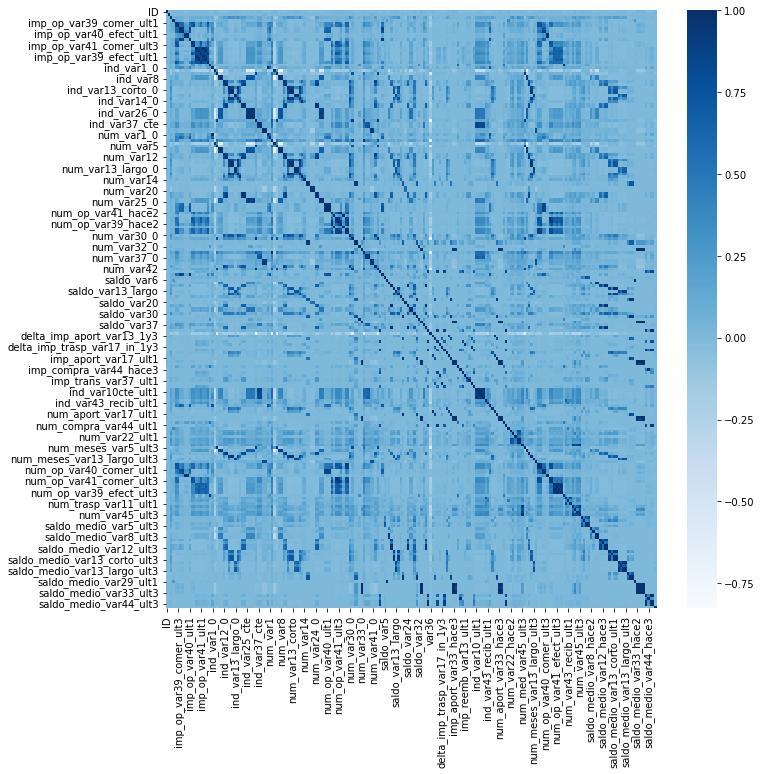

In [26]:
# Plot the correlation matrix 
plt.figure(figsize=(11,11))
sns.heatmap(correlation_matrix, cmap = 'Blues');

We'll find the highly correlated features using a function based on correlation coefficients above the threshold of 0.8.

In [27]:
def correlation(dataset, threshold):
    # Create set for correlated columns
    corelated_cols = set()  
    # Compute correlation 
    corr_matrix = dataset.corr()
    for c in range(len(corr_matrix.columns)):
        for j in range(c):
            # We take absolute correlation coefficient value 
            # If this abs values are above threshold...
            if abs(corr_matrix.iloc[c, j]) > threshold: 
                # ...Get the name of column
                colname = corr_matrix.columns[c]
                corelated_cols.add(colname)
    return corelated_cols

In [28]:
# Use correlation function on X_train with threshold 0.8
corr_features_to_drop = correlation(X_train, 0.8)
len(set(corr_features_to_drop))

131

In [29]:
# Drop correlated features from X_train and X_test
X_train.drop(labels = corr_features_to_drop, axis = 1, inplace = True)
X_test.drop(labels = corr_features_to_drop, axis = 1, inplace = True)

In [30]:
# Get the shape of X_train and X_test
X_train.shape, X_test.shape

((2800, 83), (1200, 83))

## TASK

You will be using an altered dataset containing variants of the Portuguese 'Vinho Verde' wine $^{2}$. The features provide information about wine samples recorded based on physicochemical tests. There is also the target feature that denotes the quality score of the sample. 

In [32]:
# Load the dataset 'wine_quality.csv' and store it to variable wine
wine = pd.read_csv('../Data/quality_of_wine.csv', sep = ',', )
# Get the first 10 rows
wine.head(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,pH_value,Total SO2
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,3.51,34.0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,3.20,67.0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,3.26,54.0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,3.16,60.0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,3.51,34.0
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,3.51,40.0
6,6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,3.30,59.0
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,3.39,21.0
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,3.36,18.0
9,9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,3.35,102.0


In [33]:
# Print dataframe's datatypes
wine.dtypes

Unnamed: 0                int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
pH_value                float64
Total SO2               float64
dtype: object

Several numerical features are stored as float or integer, and one feature is stored as string data in our dataset. 

These numerical variables can be used to predict the quality of wine samples. So **'quality'** column is our **target feature**.  

In [34]:
# Separate dataset 'wine' into training and testing set
# Store it in variables: X_training, X_testing, y_training, y_testing
# Drop target feature 'quality'
# Set test_size = 0.3 and random_state = 42

X_training, X_testing, y_training, y_testing = train_test_split(wine.drop(labels = ['quality'], axis=1), 
                                                                wine['quality'],
                                                                test_size = 0.3,
                                                                random_state = 42)

# Get the shape of training and testing set
X_training.shape, X_testing.shape

((1119, 15), (480, 15))

As we already know, there is one non-numerical variable ('type'). Let's look at the unique values of this feature.

In [35]:
# Print unique values of 'type' column in X_training and X_testing sets
print(X_training['type'].unique())
print(X_testing['type'].unique())

['red']
['red']


The datasets can also contain this type of constant feature stored as a string and have only 1 unique value/category. As this variable is not really helpful, we will drop it from the dataset. 

In [36]:
# TASK >>>> Remove constant feature from X_training using '.drop()', do not forget specify argument inplace = True
X_training.drop('type', axis = 1, inplace = True)

# TASK >>>> Remove constant feature from X_testing using '.drop()', do not forget specify argument inplace = True
X_testing.drop('type', axis = 1, inplace = True)

# Get the shape of X_training and X_testing sets
X_training.shape, X_testing.shape

((1119, 14), (480, 14))

Now we want to select only those features that have the variance above the threshold = 0.01. Again, we will find quasi-constant features using `scikit learn's VarianceThreshold` as we did in the previous example.

In [37]:
# TASK >>>> Define VarianceThreshold() object, specify parameter threshold = 0.01 and store it in variable 'selector'
selector = VarianceThreshold(0.01)

In [38]:
# TASK >>>> Fit X_training set with 'selector'
selector.fit(X_training)

VarianceThreshold(threshold=0.01)

In [39]:
# Get the mask of features we want to keep in the dataset and store it in variable 'features_we_keep'
features_we_keep = X_training.columns[selector.get_support()]
# Print the length of the variable features_we_keep
print('The number of features that will be kept: {}'.format(len(features_we_keep)))

The number of features that will be kept: 12


In [40]:
# Print the quasi-constant features that are meant to drop using for loop 
for column in X_training.columns:
    if column not in features_we_keep:
        print(column)

chlorides
density


In [41]:
# TASK >>>> Transform X_training 

X_training = selector.transform(X_training)

# TASK >>>> Transform X_testing
X_testing = selector.transform(X_testing)

# Get the shape of X_training and X_testing
X_training.shape, X_testing.shape

((1119, 12), (480, 12))

In [42]:
# Convert X_training to pandas DataFrame
X_training = pd.DataFrame(X_training)
# Using '.columns' attribute assign column names
X_training.columns = features_we_keep

# Convert X_testing to pandas DataFrame
X_testing = pd.DataFrame(X_training)
# Using '.columns' attribute assign column names
X_testing.columns = features_we_keep

# Get the first 10 rows of X_train
X_training.head(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,pH_value,Total SO2
0,925.0,8.6,0.220,0.36,1.9,53.0,77.0,3.47,0.87,11.0,3.47,77.0
1,363.0,12.5,0.460,0.63,2.0,6.0,15.0,2.99,0.87,10.2,2.99,15.0
2,906.0,7.2,0.540,0.27,2.6,12.0,78.0,3.39,0.71,11.0,3.39,78.0
3,426.0,6.4,0.670,0.08,2.1,19.0,48.0,3.49,0.49,11.4,3.49,48.0
4,1251.0,7.5,0.580,0.14,2.2,27.0,60.0,3.28,0.59,9.8,3.28,60.0
5,1274.0,7.8,0.580,0.13,2.1,17.0,36.0,3.24,0.53,11.2,3.24,36.0
6,346.0,6.6,0.815,0.02,2.7,17.0,34.0,3.58,0.89,12.3,3.58,34.0
7,1105.0,6.3,0.570,0.28,2.1,13.0,49.0,3.41,0.60,12.8,3.41,49.0
8,1564.0,7.2,0.695,0.13,2.0,12.0,20.0,3.29,0.54,10.1,3.29,20.0
9,643.0,9.5,0.590,0.44,2.3,21.0,68.0,3.46,0.63,9.5,3.46,68.0


Find whether our dataset contains duplicated features. You can copy-paste the `for` loop we've already used.

In [43]:
# Find duplicated features in X_training set
features_duplicates = []
for col in range(len(X_training.columns)):
     
    column_1 = X_training.columns[col]
    
    for column_2 in X_training.columns[col + 1:]:
        if X_training[column_1].equals(X_training[column_2]):
            features_duplicates.append(column_2)
            
len(features_duplicates)

2

In [44]:
# Print the features names
features_duplicates

['Total SO2', 'pH_value']

In [45]:
# TASK >>>> Drop these duplicated features from X_training and X_testing

X_training.drop(labels = features_duplicates, axis = 1, inplace = True)
X_testing.drop(labels = features_duplicates, axis = 1, inplace = True)

In [46]:
# Get the shape of X_training and X_testing
X_training.shape, X_testing.shape

((1119, 10), (1119, 10))

# Apendix

Data sources:

$^{1}$ Santander dataset: https://www.kaggle.com/c/santander-customer-satisfaction/data

$^{2}$ Wine quality dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

Material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science)